In [1]:
import pandas as pd 
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt 
from scipy import stats      

In [2]:
berywn = pd.read_csv("new_Berwyn_Heights_riverlevel.csv")
berywn = pd.DataFrame(berywn)
berywn

,date,riverlevel
0,1/15/14 16:00,2.42
1,1/15/14 17:00,2.42
2,1/15/14 18:00,2.42
3,1/15/14 19:00,2.42
4,1/15/14 20:00,2.42
...,...,...
87274,12/31/23 2:00,1.99
87275,12/31/23 3:00,1.99
87276,12/31/23 4:00,1.99
87277,12/31/23 5:00,1.99


In [3]:
berywn['date'] = pd.to_datetime(berywn['date'])
berywn

C:\Users\ndugl\AppData\Local\Temp\ipykernel_16656\2538651415.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  berywn['date'] = pd.to_datetime(berywn['date'])


,date,riverlevel
0,2014-01-15 16:00:00,2.42
1,2014-01-15 17:00:00,2.42
2,2014-01-15 18:00:00,2.42
3,2014-01-15 19:00:00,2.42
4,2014-01-15 20:00:00,2.42
...,...,...
87274,2023-12-31 02:00:00,1.99
87275,2023-12-31 03:00:00,1.99
87276,2023-12-31 04:00:00,1.99
87277,2023-12-31 05:00:00,1.99


# Converting the date to datetime and Extracting just the day to find the agg per day

In [4]:
berywn['date'] = pd.to_datetime(berywn['date'])

In [5]:
z_scores = np.abs(stats.zscore(berywn['riverlevel']))
threshold = 3

# Filter out rows where the z-score is above the threshold
monthly_avg = berywn[z_scores < threshold]

monthly_avg

,date,riverlevel
0,2014-01-15 16:00:00,2.42
1,2014-01-15 17:00:00,2.42
2,2014-01-15 18:00:00,2.42
3,2014-01-15 19:00:00,2.42
4,2014-01-15 20:00:00,2.42
...,...,...
87274,2023-12-31 02:00:00,1.99
87275,2023-12-31 03:00:00,1.99
87276,2023-12-31 04:00:00,1.99
87277,2023-12-31 05:00:00,1.99


In [6]:
berywn['day'] = berywn['date'].dt.date


### average per day

In [7]:
daily_avg_df = berywn.groupby('day').agg({
    'riverlevel': 'mean'   # Calculate the mean riverlevel for each day
}).reset_index()

# Step 4: Display the resulting DataFrame with daily averages
daily_avg_df

,day,riverlevel
0,2014-01-15,2.405000
1,2014-01-16,2.266667
2,2014-01-17,2.150000
3,2014-01-18,2.090000
4,2014-01-19,2.031667
...,...,...
3633,2023-12-27,2.670000
3634,2023-12-28,3.621667
3635,2023-12-29,2.345417
3636,2023-12-30,2.065000


### per month

In [8]:
berywn['year'] = berywn['date'].dt.year
berywn['month'] = berywn['date'].dt.month

In [22]:
# Step 3: Group by year and month, and calculate the mean riverlevel for each month
monthly_avg_df = berywn.groupby(['year', 'month']).agg({
    'riverlevel': 'mean'  # Calculate the mean riverlevel for each month
}).reset_index()

# Step 4: Display the resulting DataFrame with monthly averages
monthly_avg_df

,year,month,riverlevel
0,2014,1,2.052143
1,2014,2,1.920000
2,2014,3,2.044274
3,2014,4,0.557639
4,2014,5,0.640000
...,...,...,...
115,2023,8,1.885968
116,2023,9,2.000458
117,2023,10,1.773602
118,2023,11,1.913597


#### using the z score to see how randomized these values might have been
      #####  A z-score will help us know exactly how different postively or negatively you are compared to the average. If you have a positive z-score, it means you're taller than average. If you have a negative z-score, it means you're lesser than average.

      ##### a p value if you flip a coin. The p-value tells you how likely it is to get something that weird, like 8 heads in a row, if the coin was actually normal. If the p-value is small (like 0.05 or less), it means getting that many heads is very rare, and maybe the coin is acting weird!

In [26]:
monthly_avg_df['z_score'] = stats.zscore(monthly_avg_df['riverlevel'])

monthly_avg_df['p_value'] = stats.norm.sf(abs(monthly_avg_df['z_score'])) * 2

# Step 3: Display the DataFrame with z-scores and p-values
monthly_avg_df

,year,month,riverlevel,z_score,p_value
0,2014,1,2.052143,-0.166084,8.680906e-01
1,2014,2,1.920000,-0.602047,5.471428e-01
2,2014,3,2.044274,-0.192044,8.477074e-01
3,2014,4,0.557639,-5.096718,3.455917e-07
4,2014,5,0.640000,-4.824995,1.400071e-06
...,...,...,...,...,...
115,2023,8,1.885968,-0.714326,4.750259e-01
116,2023,9,2.000458,-0.336601,7.364179e-01
117,2023,10,1.773602,-1.085040,2.779041e-01
118,2023,11,1.913597,-0.623171,5.331722e-01


In [27]:
# monthly_avg_df.tail(60)

#### Threshold point
    ### what we will consider over flowing of the river

In [12]:
monthly_avg_df['riverlevel'].mean()

2.1024839873181507

#### thresholdpoint was 2.45 before feature scaling and after was 2.10

In [13]:
df = pd.DataFrame(monthly_avg_df)

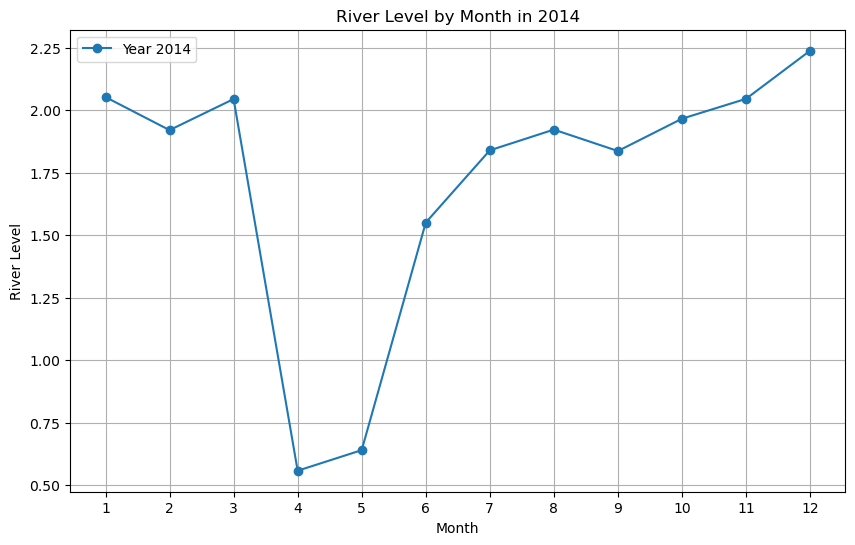

In [14]:
data_2014 = df[df['year'] == 2014]

# Plotting river levels for 2014
plt.figure(figsize=(10, 6))
plt.plot(data_2014['month'], data_2014['riverlevel'], marker='o', label="Year 2014")

plt.title('River Level by Month in 2014')
plt.xlabel('Month')
plt.ylabel('River Level')
plt.grid(True)
plt.xticks(range(1, 13))  # Ensure all months from 1 to 12 are shown
plt.legend()
plt.show()

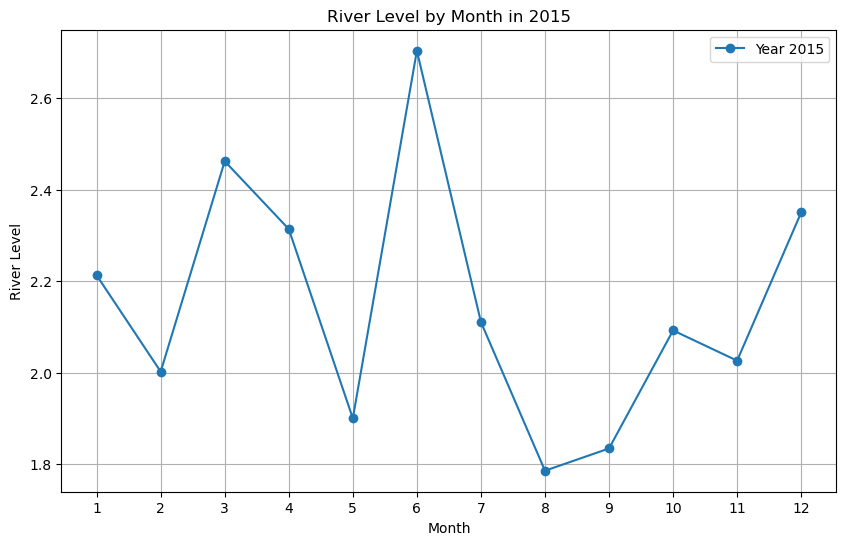

In [15]:
data_2015 = df[df['year'] == 2015]

# Plotting river levels for 2014
plt.figure(figsize=(10, 6))
plt.plot(data_2015['month'], data_2015['riverlevel'], marker='o', label="Year 2015")

plt.title('River Level by Month in 2015')
plt.xlabel('Month')
plt.ylabel('River Level')
plt.grid(True)
plt.xticks(range(1, 13))  # Ensure all months from 1 to 12 are shown
plt.legend()
plt.show()

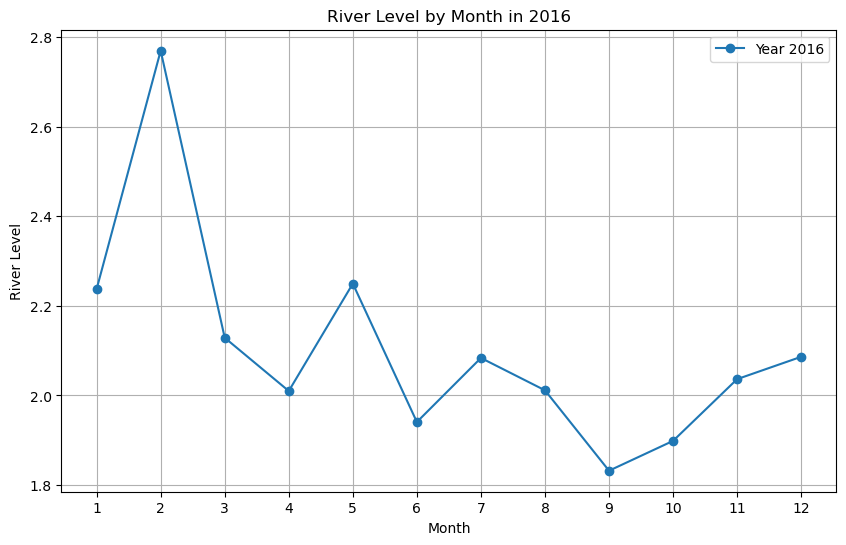

In [16]:
data_2016 = df[df['year'] == 2016]

# Plotting river levels for 2014
plt.figure(figsize=(10, 6))
plt.plot(data_2016['month'], data_2016['riverlevel'], marker='o', label="Year 2016")

plt.title('River Level by Month in 2016')
plt.xlabel('Month')
plt.ylabel('River Level')
plt.grid(True)
plt.xticks(range(1, 13))  # Ensure all months from 1 to 12 are shown
plt.legend()
plt.show()

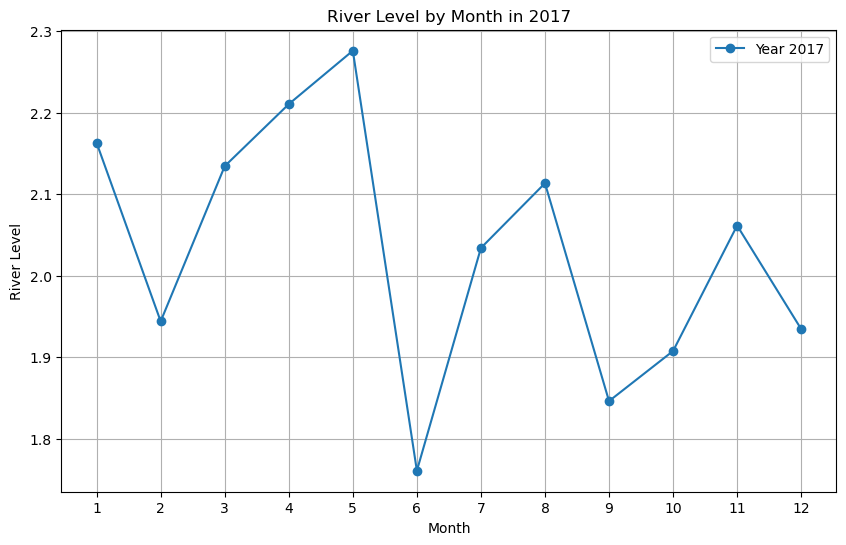

In [17]:
data_2017 = df[df['year'] == 2017]

# Plotting river levels for 2014
plt.figure(figsize=(10, 6))
plt.plot(data_2017['month'], data_2017['riverlevel'], marker='o', label="Year 2017")

plt.title('River Level by Month in 2017')
plt.xlabel('Month')
plt.ylabel('River Level')
plt.grid(True)
plt.xticks(range(1, 13))  # Ensure all months from 1 to 12 are shown
plt.legend()
plt.show()

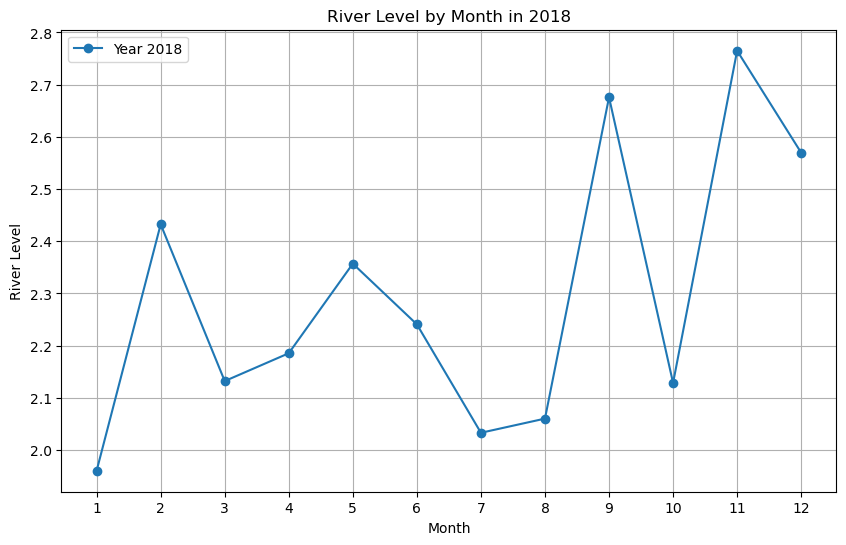

In [18]:
data_2018 = df[df['year'] == 2018]

# Plotting river levels for 2014
plt.figure(figsize=(10, 6))
plt.plot(data_2018['month'], data_2018['riverlevel'], marker='o', label="Year 2018")

plt.title('River Level by Month in 2018')
plt.xlabel('Month')
plt.ylabel('River Level')
plt.grid(True)
plt.xticks(range(1, 13))  # Ensure all months from 1 to 12 are shown
plt.legend()
plt.show()

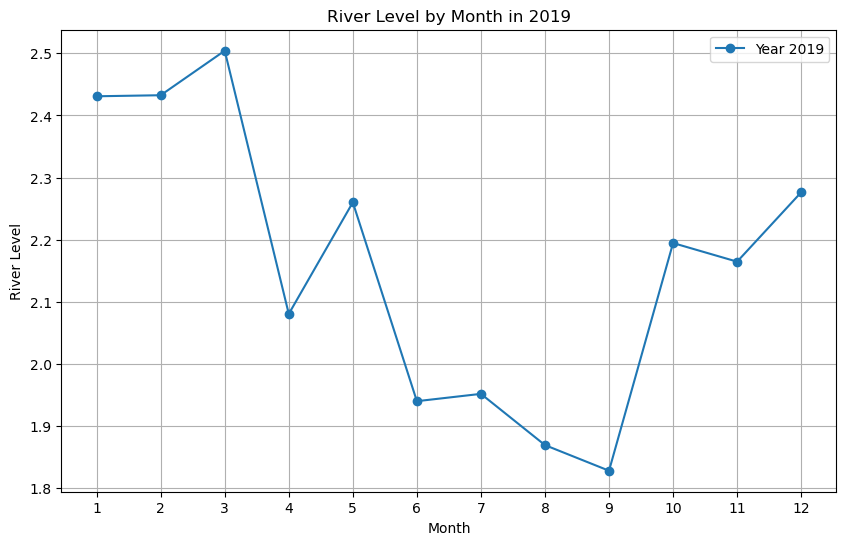

In [19]:
data_2019 = df[df['year'] == 2019]

# Plotting river levels for 2014
plt.figure(figsize=(10, 6))
plt.plot(data_2019['month'], data_2019['riverlevel'], marker='o', label="Year 2019")

plt.title('River Level by Month in 2019')
plt.xlabel('Month')
plt.ylabel('River Level')
plt.grid(True)
plt.xticks(range(1, 13))  # Ensure all months from 1 to 12 are shown
plt.legend()
plt.show()

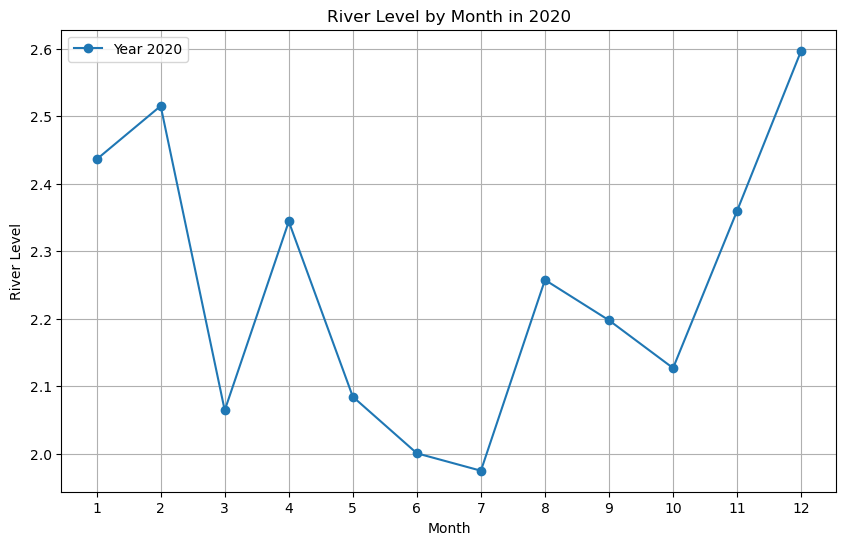

In [114]:
data_2020 = df[df['year'] == 2020]

# Plotting river levels for 2014
plt.figure(figsize=(10, 6))
plt.plot(data_2020['month'], data_2020['riverlevel'], marker='o', label="Year 2020")

plt.title('River Level by Month in 2020')
plt.xlabel('Month')
plt.ylabel('River Level')
plt.grid(True)
plt.xticks(range(1, 13))  # Ensure all months from 1 to 12 are shown
plt.legend()
plt.show()

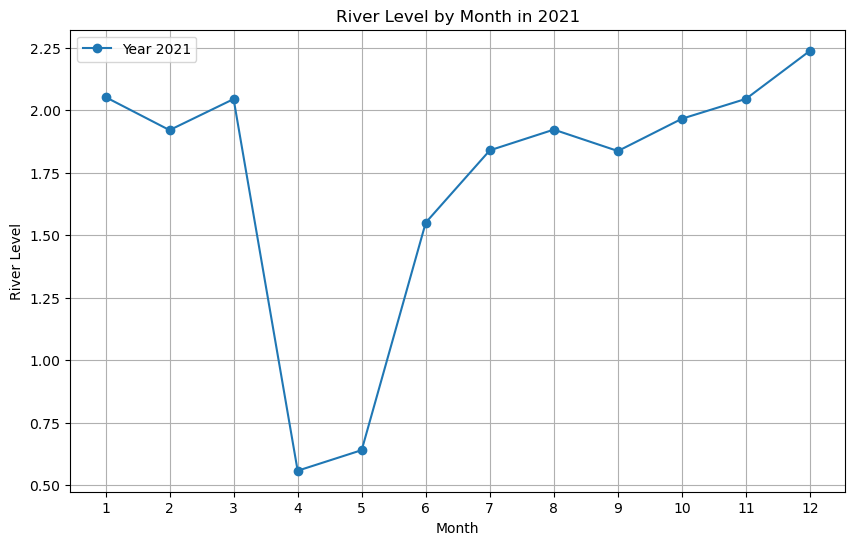

In [115]:
data_2021 = df[df['year'] == 2021]

# Plotting river levels for 2014
plt.figure(figsize=(10, 6))
plt.plot(data_2021['month'], data_2014['riverlevel'], marker='o', label="Year 2021")

plt.title('River Level by Month in 2021')
plt.xlabel('Month')
plt.ylabel('River Level')
plt.grid(True)
plt.xticks(range(1, 13))  # Ensure all months from 1 to 12 are shown
plt.legend()
plt.show()

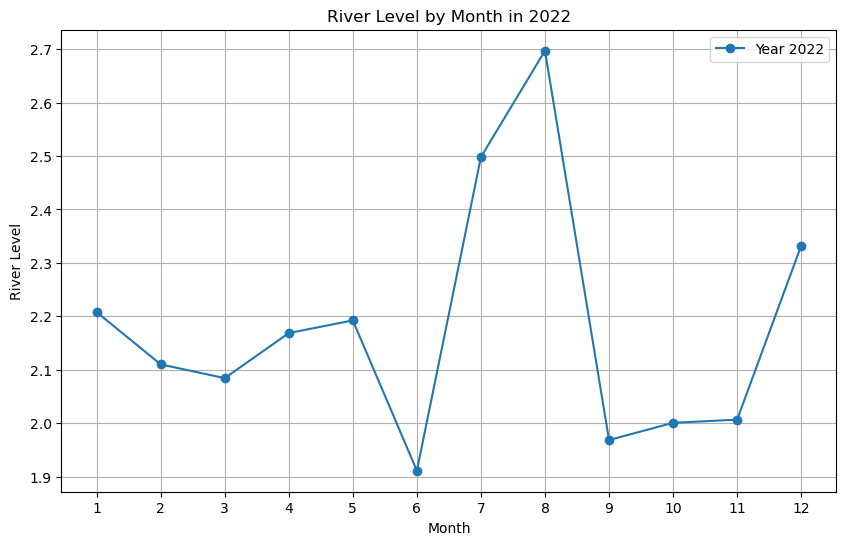

In [116]:
data_2022 = df[df['year'] == 2022]

# Plotting river levels for 2014
plt.figure(figsize=(10, 6))
plt.plot(data_2022['month'], data_2022['riverlevel'], marker='o', label="Year 2022")

plt.title('River Level by Month in 2022')
plt.xlabel('Month')
plt.ylabel('River Level')
plt.grid(True)
plt.xticks(range(1, 13))  # Ensure all months from 1 to 12 are shown
plt.legend()
plt.show()

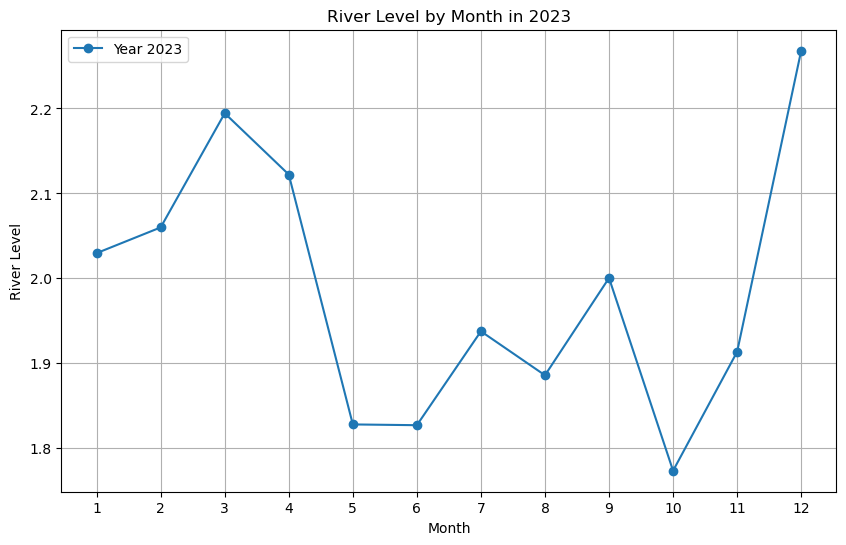

In [117]:
data_2023 = df[df['year'] == 2023]

# Plotting river levels for 2014
plt.figure(figsize=(10, 6))
plt.plot(data_2023['month'], data_2023['riverlevel'], marker='o', label="Year 2023")

plt.title('River Level by Month in 2023')
plt.xlabel('Month')
plt.ylabel('River Level')
plt.grid(True)
plt.xticks(range(1, 13))  # Ensure all months from 1 to 12 are shown
plt.legend()
plt.show()